In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('DADOS_TCC.xlsx')

In [3]:
df = df.rename(columns={"Listagem de pré-embarque, Período considerado: 01/01/2002 até 30/06/2023": "Cliente", "Unnamed: 2": "Ano da Operação","Unnamed: 4": "Valor Desembolsado em Reais", "Unnamed: 1": "UF", "Unnamed: 5": "Setor CNAE", "Unnamed: 6": "Subsetor CNAE Agrupado",
                   "Unnamed: 7": "Porte do cliente", "Unnamed: 8": "Natureza", "Unnamed: 9": "Instituição Financeira Credenciada", "Unnamed: 3": "Valor da Operação em R$"})

In [4]:
df['Valor Desembolsado em Reais'] = pd.to_numeric(df['Valor Desembolsado em Reais'], errors='coerce')
df.dropna(subset=['Valor Desembolsado em Reais'], inplace=True)

## Definindo as regiões

In [5]:
df['UF'] = df['UF'].str.strip()
unique_ufs = df['UF'].unique()

In [6]:
Regiãos = {
    'Sudeste': ['SP', 'RJ', 'MG', 'ES'],
    'Sul': ['PR', 'SC', 'RS'],
    'Centro-Oeste': ['MT', 'MS', 'GO', 'DF', 'TO'],
    'Norte': ['AM', 'PA', 'RO', 'RR', 'AC', 'AP'],
    'Nordeste': ['BA', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
}

uf_to_Região = {uf: Região for Região, ufs in Regiãos.items() for uf in ufs}

df['Região'] = df['UF'].map(uf_to_Região)


## Desembolso por UF 

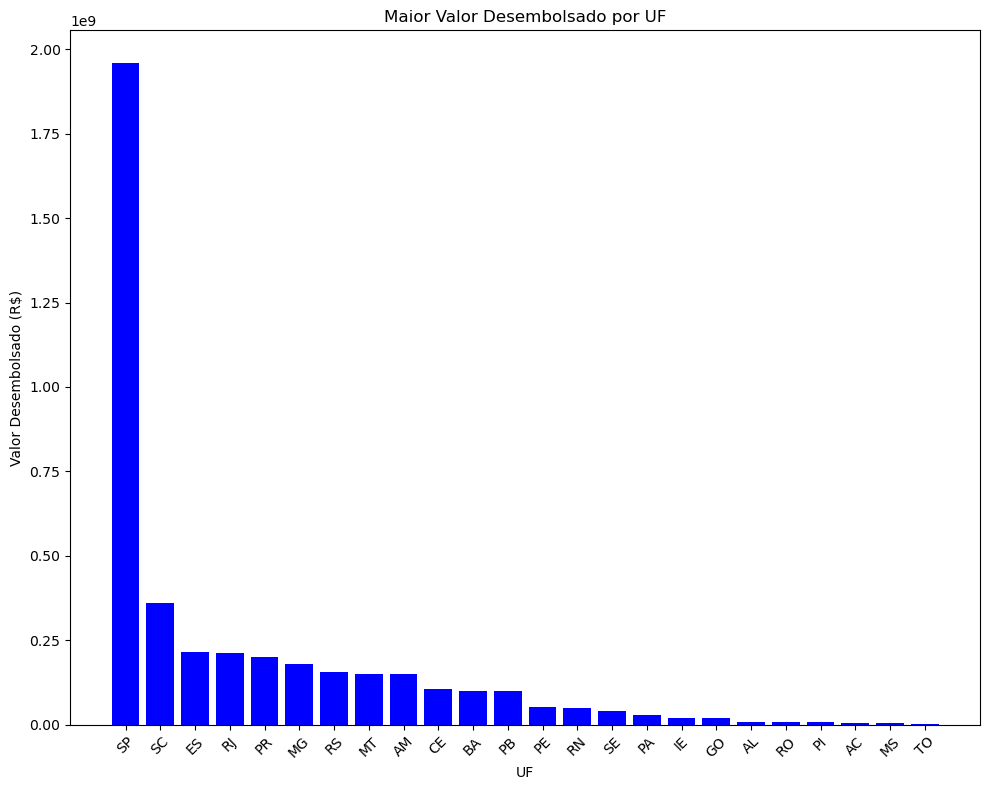

In [7]:
max_desembolso_per_uf = df.groupby('UF')['Valor Desembolsado em Reais'].max().reset_index()


max_values = df.groupby('UF')['Valor Desembolsado em Reais'].max()

max_values_sorted = max_values.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
plt.bar(max_values_sorted.index, max_values_sorted.values, color='blue')
plt.xlabel('UF')
plt.ylabel('Valor Desembolsado (R$)')
plt.title('Maior Valor Desembolsado por UF') 
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

## Desembolso por UF sem SP

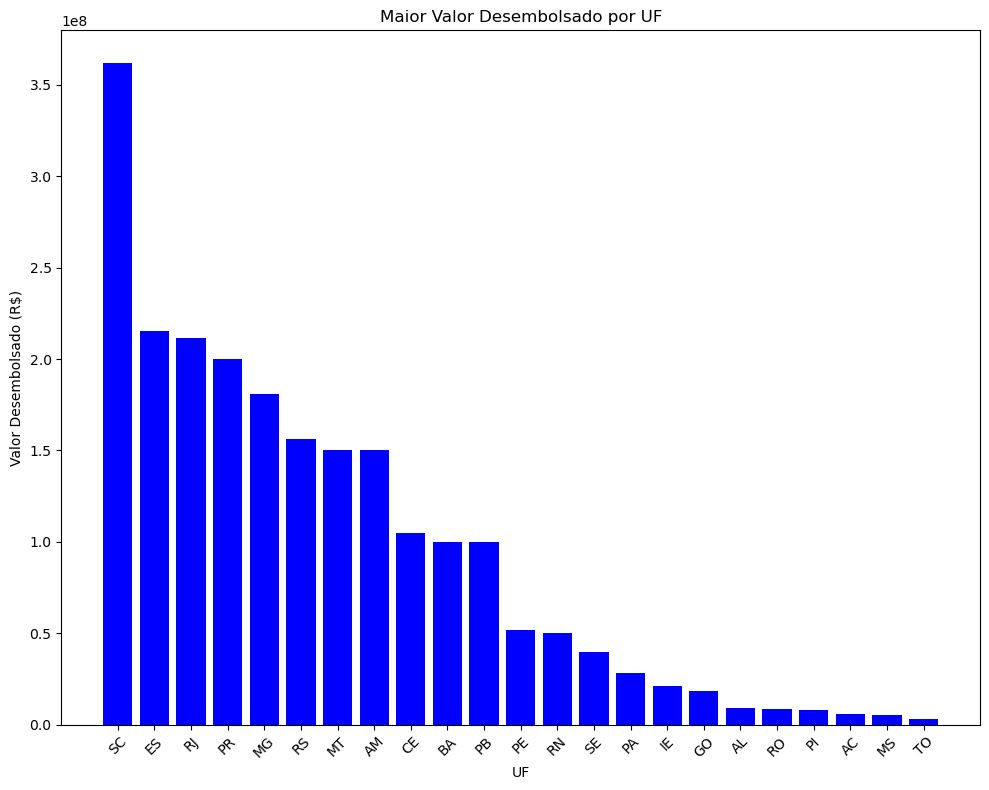

In [8]:
max_desembolso_per_uf = df.groupby('UF')['Valor Desembolsado em Reais'].max().reset_index()


max_values = df.groupby('UF')['Valor Desembolsado em Reais'].max()

max_values_sorted = max_values.sort_values(ascending=False)

max_values_sorted = max_values_sorted.drop('SP')

plt.figure(figsize=(10, 8))
plt.bar(max_values_sorted.index, max_values_sorted.values, color='blue')
plt.xlabel('UF')
plt.ylabel('Valor Desembolsado (R$)')
plt.title('Maior Valor Desembolsado por UF') 
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

## Valor desembolsado por setor CNAE - análise Regional

In [9]:
grouped_data = df.groupby(['Região', 'UF', 'Setor CNAE'])['Valor Desembolsado em Reais'].sum().reset_index()

pivot_table = grouped_data.pivot_table(index=['Região', 'UF'], columns='Setor CNAE', values='Valor Desembolsado em Reais', aggfunc='sum')


In [10]:
pivot_table

Setor CNAE       AGROPECUÁRIA E PESCA  COMERCIO E SERVICOS  \
Região       UF                                              
Centro-Oeste GO                   NaN         5.807600e+06   
             MS                   NaN                  NaN   
             MT            25336740.0         7.000000e+05   
             TO                   NaN                  NaN   
Nordeste     AL                   NaN                  NaN   
             BA            31342500.0                  NaN   
             CE            54307067.0         2.418880e+07   
             PB             3391110.0                  NaN   
             PE            41229824.0         3.352534e+07   
             PI             2640565.0         3.600000e+05   
             RN           128897529.0         1.871633e+06   
             SE                   NaN                  NaN   
Norte        AC                   NaN                  NaN   
             AM                   NaN                  NaN   
             PA                   NaN         1.202700e+05   
             RO                   NaN         5.108000e+06   
Sudeste      ES             4276288.0         4.753257e+07   
             MG            43160300.0         2.198484e+08   
             RJ            11556000.0         7.384352e+08   
             SP           151038485.0         1.123421e+09   
Sul          PR            63389486.0         1.500238e+08   
             RS           166571684.0         1.124130e+08   
             SC           119246357.0         1.478914e+09   

Setor CNAE       INDUSTRIA DE TRANSFORMAÇÃO  INDUSTRIA EXTRATIVA  
Região       UF                                                   
Centro-Oeste GO                5.042619e+07           10575300.0  
             MS                9.343380e+06                  NaN  
             MT                1.993344e+08                  NaN  
             TO                4.471098e+06                  NaN  
Nordeste     AL                2.735986e+07                  NaN  
             BA                1.841251e+09            7454378.0  
             CE                1.327794e+09             712320.0  
             PB                1.858687e+08                  NaN  
             PE                4.239439e+08                  NaN  
             PI                1.646797e+07                  NaN  
             RN                3.421971e+07                  NaN  
             SE                5.921475e+07                  NaN  
Norte        AC                5.612493e+06                  NaN  
             AM                1.420327e+09                  NaN  
             PA                5.329026e+07                  NaN  
             RO                2.727319e+07                  NaN  
Sudeste      ES                1.873630e+09            4881458.0  
             MG                9.499890e+09                  NaN  
             RJ                2.833535e+09                  NaN  
             SP                6.592033e+10            5187168.0  
Sul          PR                7.691906e+09                  NaN  
             RS                1.292004e+10                  NaN  
             SC                8.786475e+09                  NaN

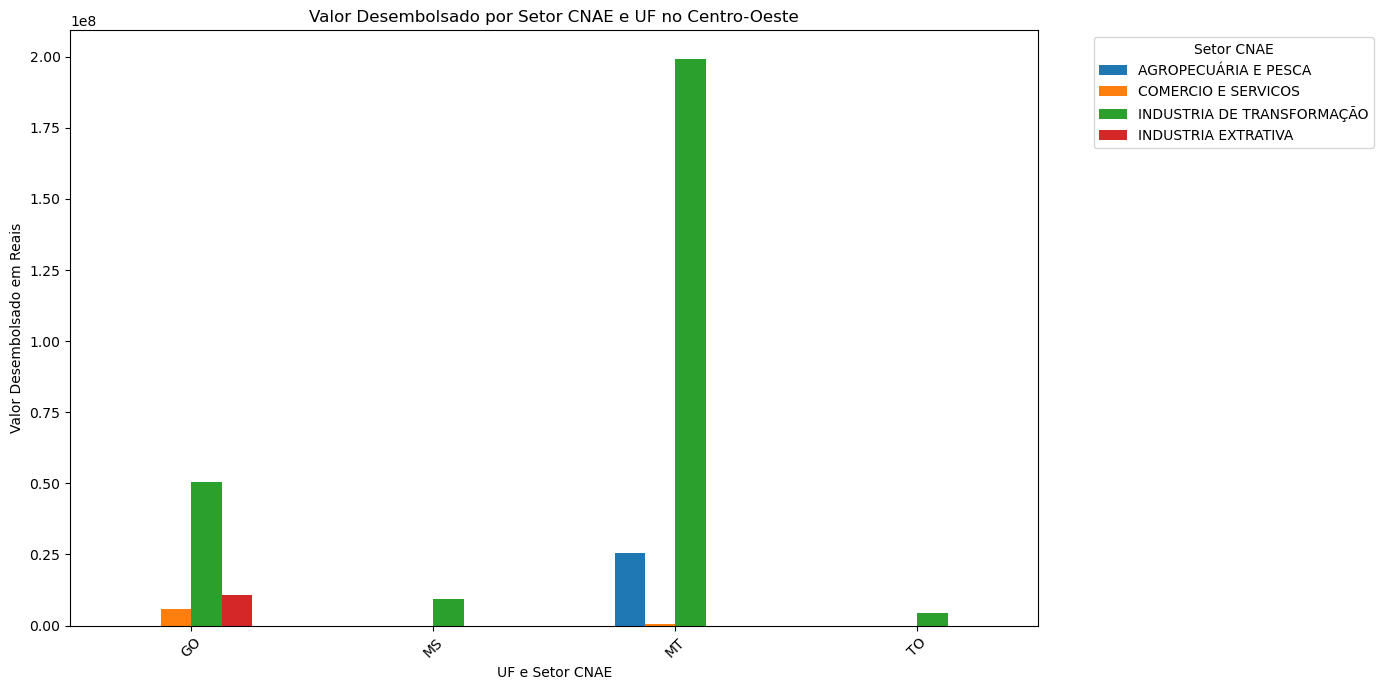

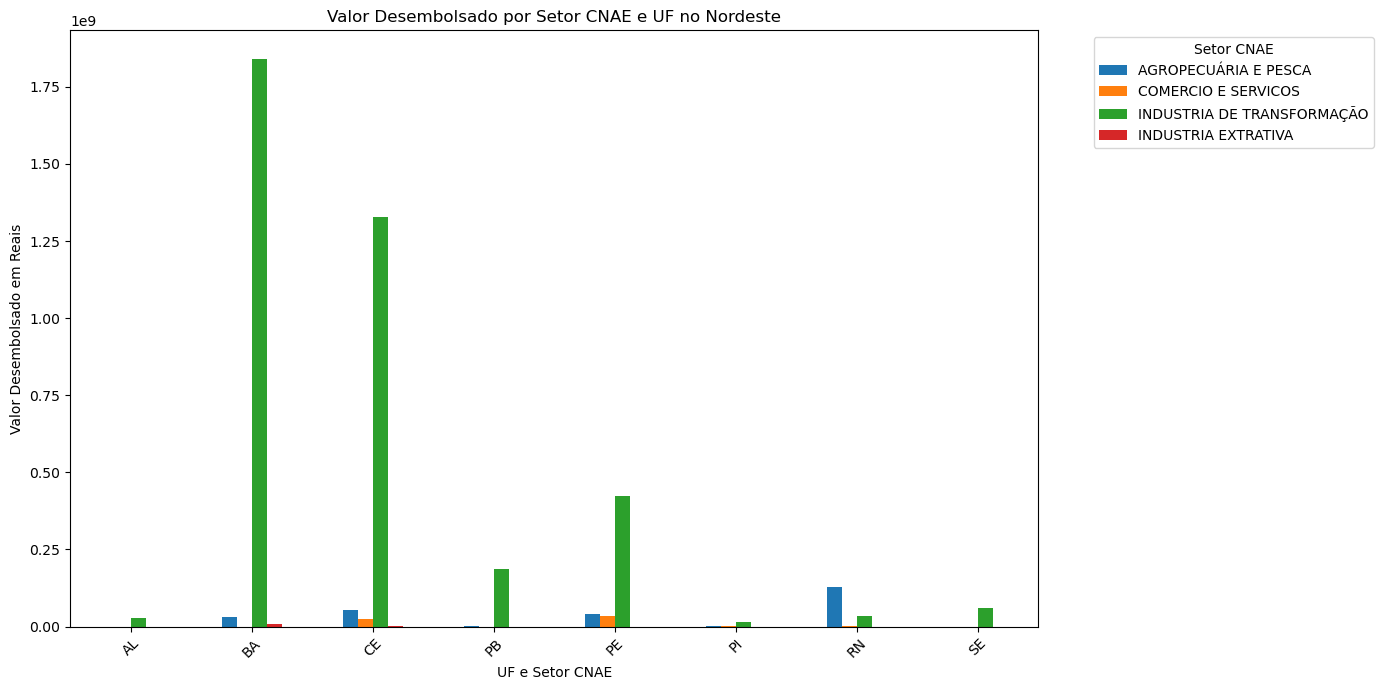

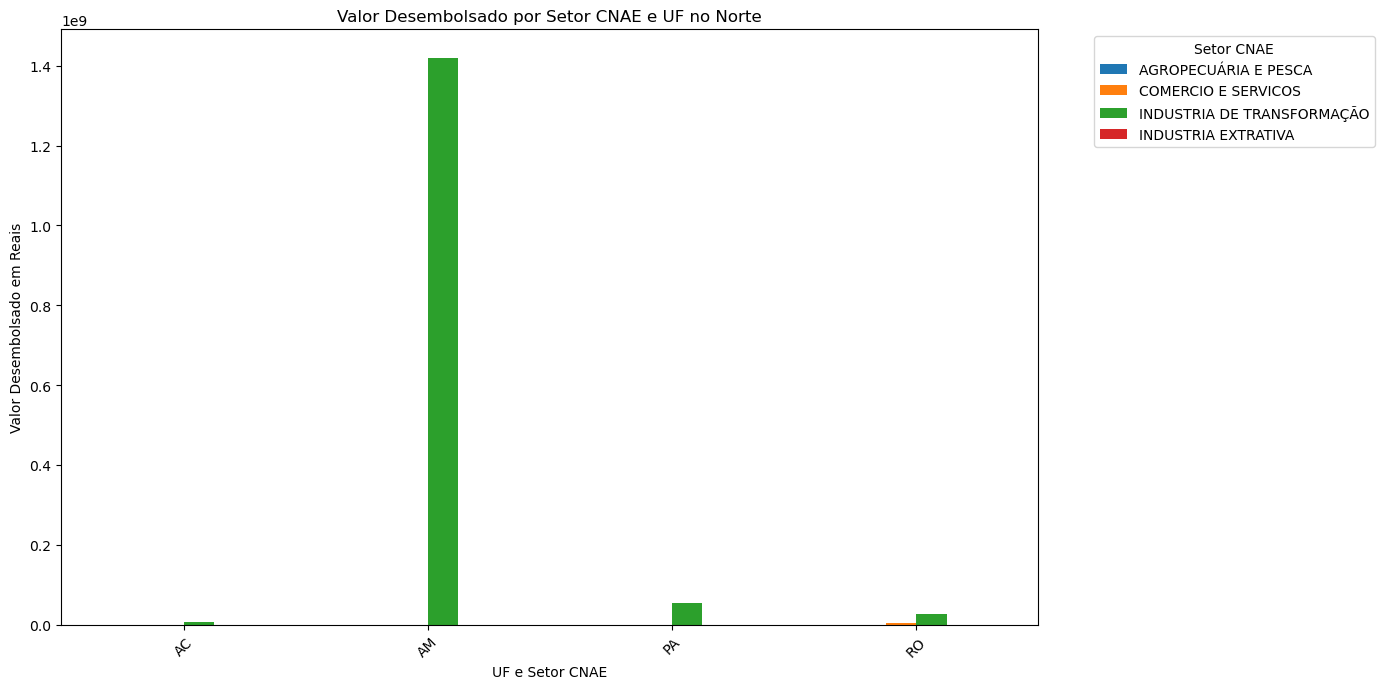

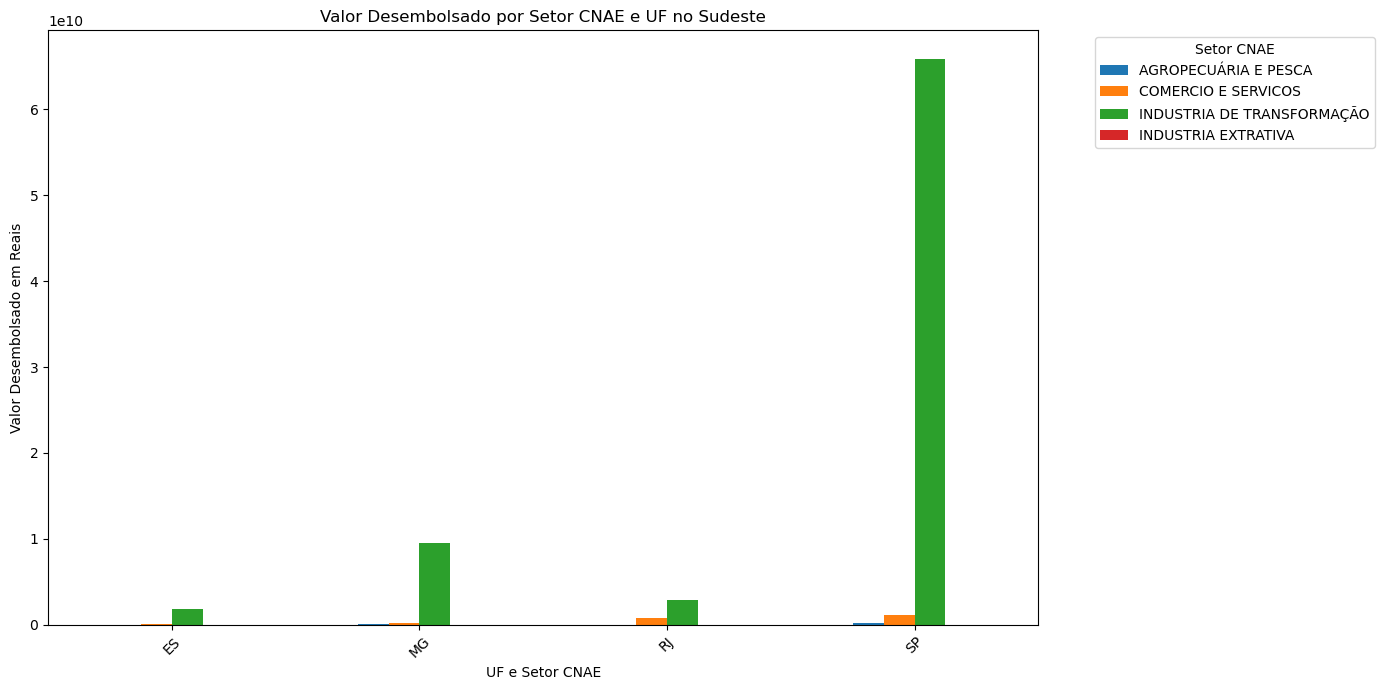

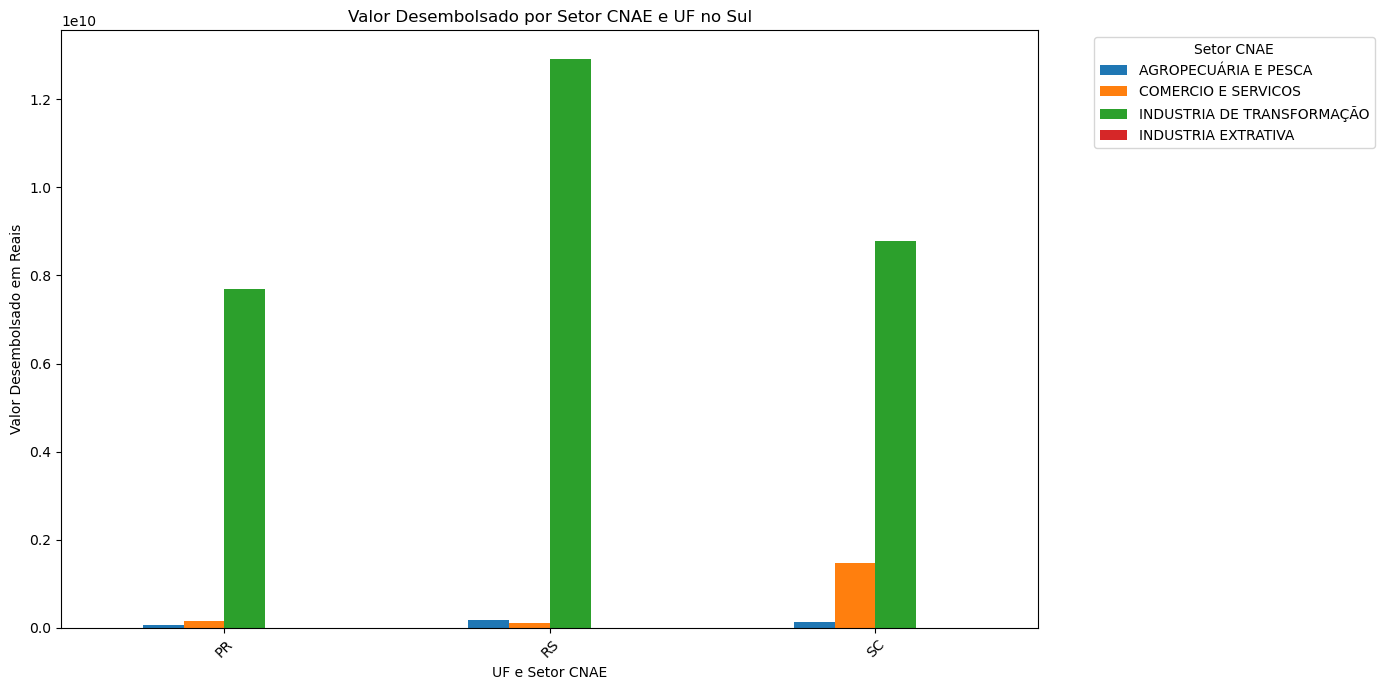

In [11]:
for Região in pivot_table.index.get_level_values(0).unique():
    Regiãoal_data = pivot_table.xs(Região, level='Região')
    Regiãoal_data.plot(kind='bar', figsize=(14, 7))
    plt.title(f'Valor Desembolsado por Setor CNAE e UF no {Região}')
    plt.ylabel('Valor Desembolsado em Reais')
    plt.xlabel('UF e Setor CNAE')
    plt.xticks(rotation=45)
    plt.legend(title='Setor CNAE', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## Valor desembolsado por setor CNAE - análise Regional (sem Indústria da Transformação)

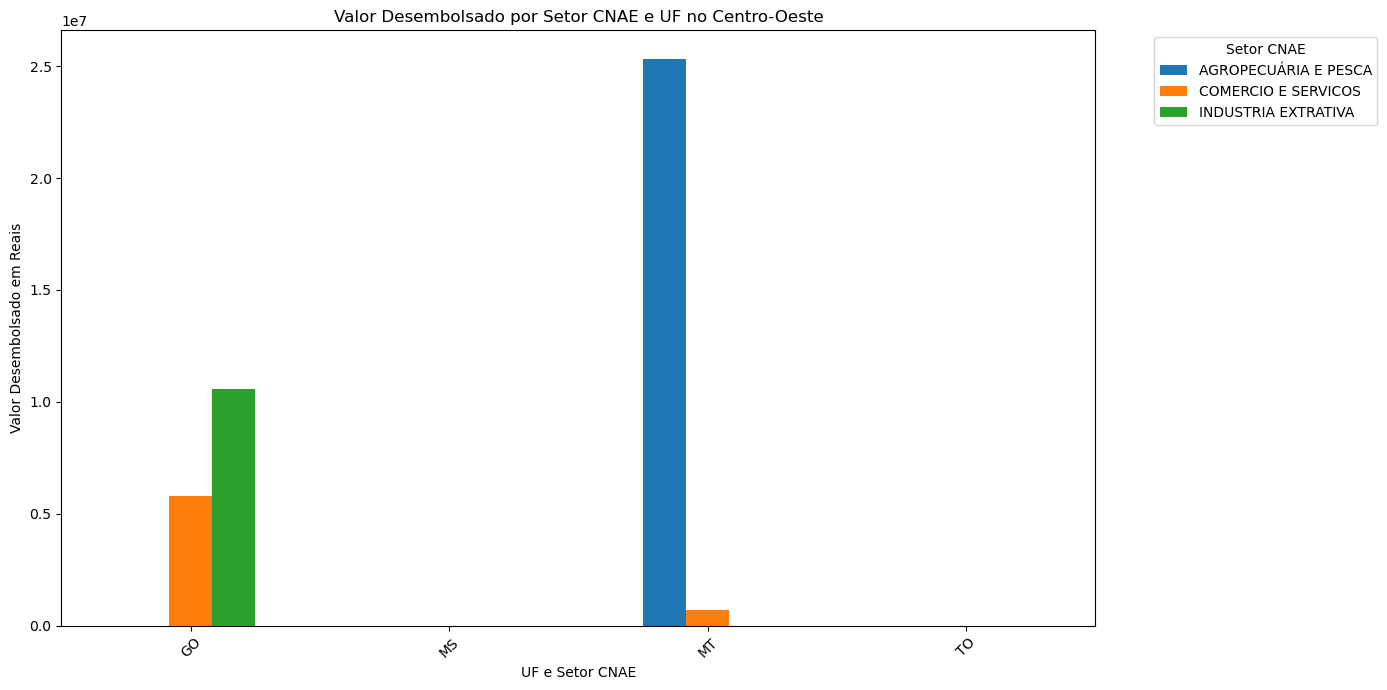

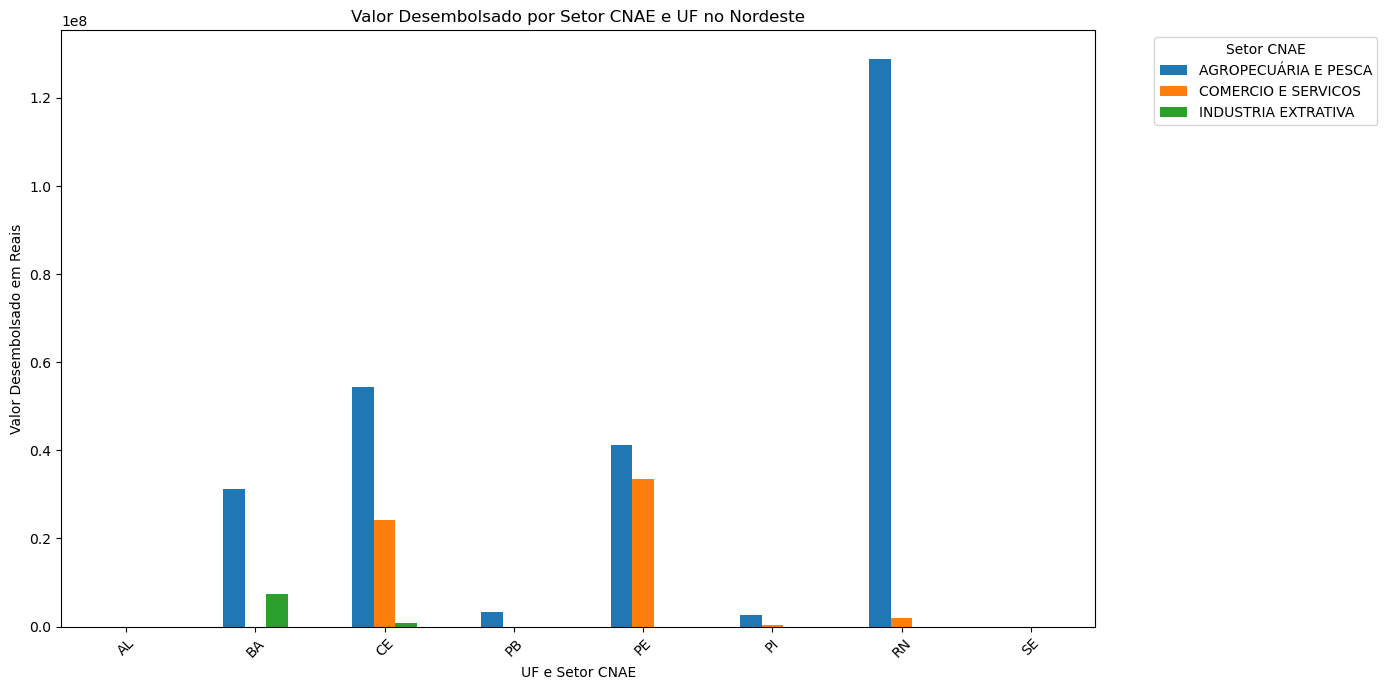

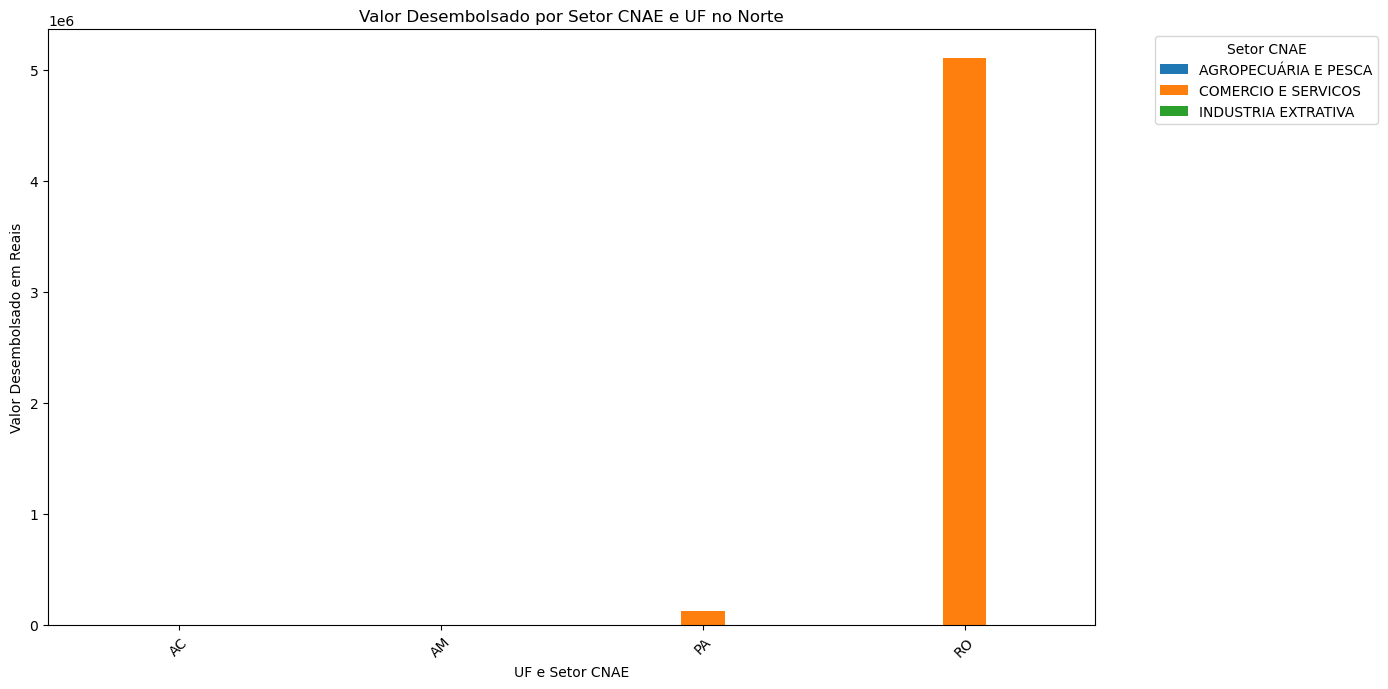

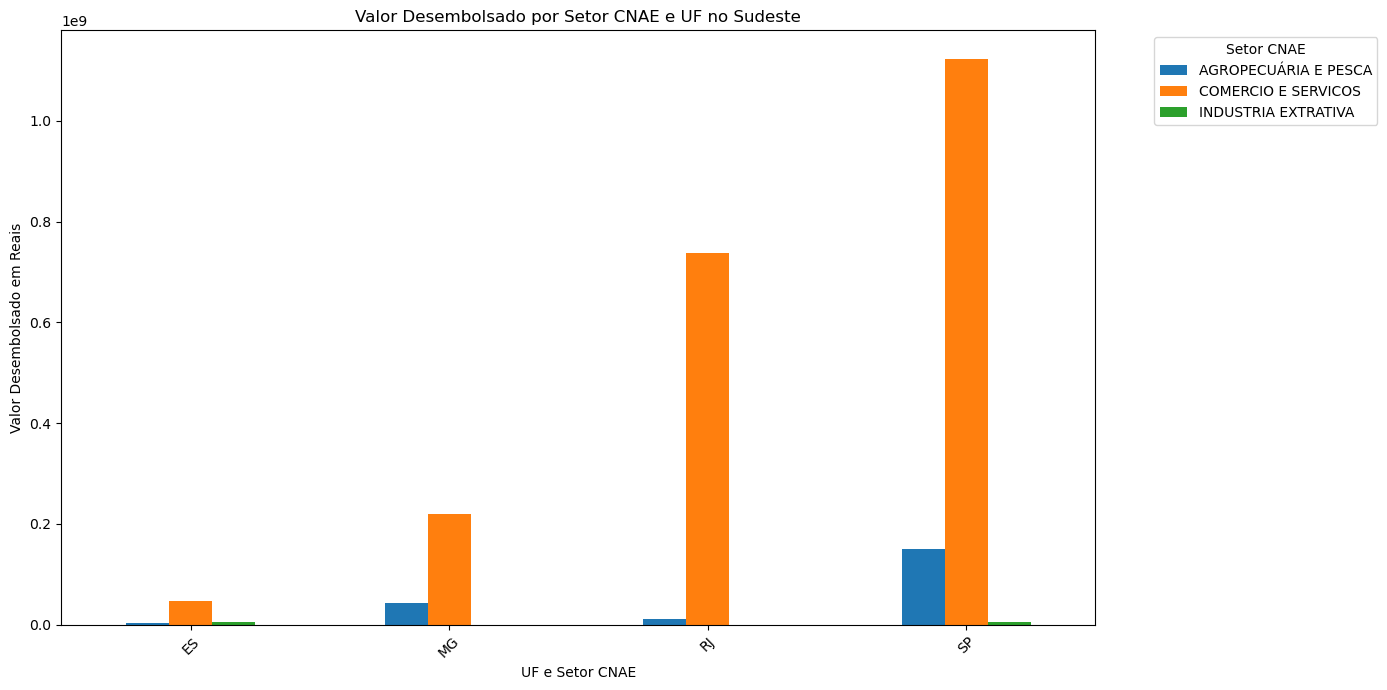

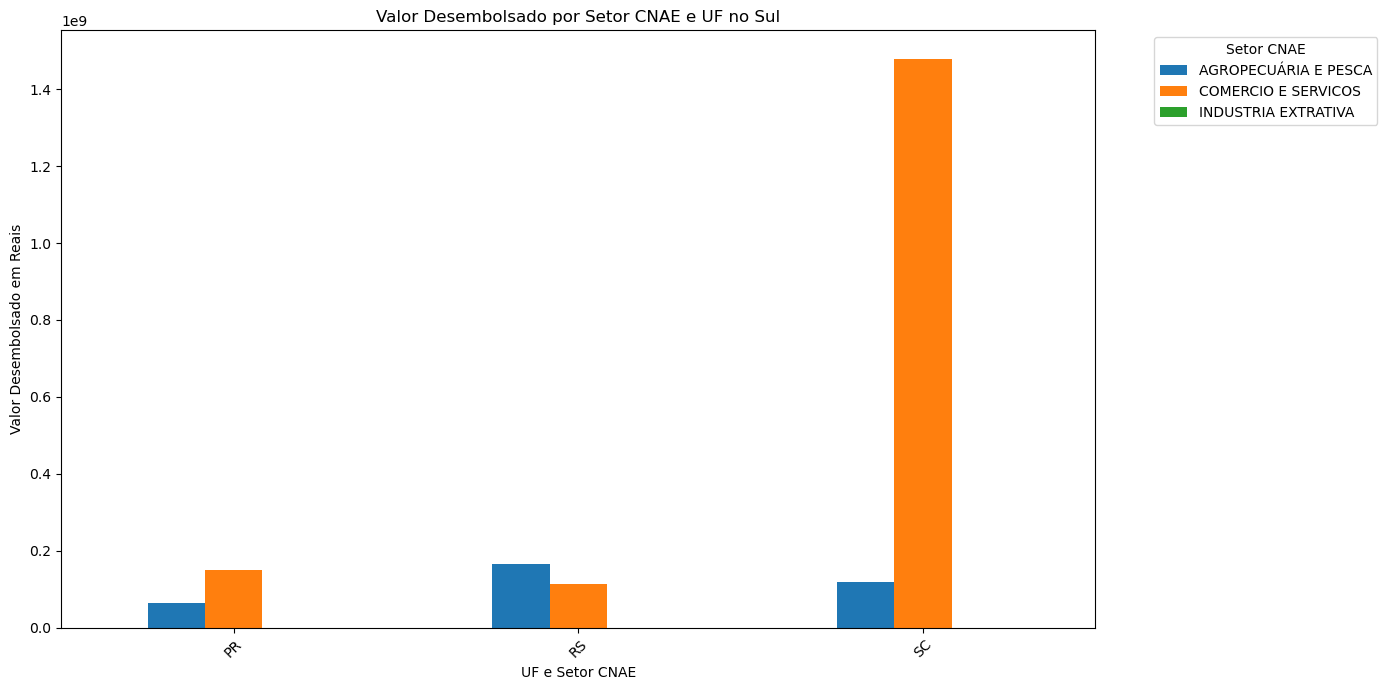

In [12]:
pivot_table2 = pivot_table.drop('INDUSTRIA DE TRANSFORMAÇÃO', axis=1)
for Região in pivot_table2.index.get_level_values(0).unique():
    Regiãoal_data = pivot_table2.xs(Região, level='Região')
    Regiãoal_data.plot(kind='bar', figsize=(14, 7))
    plt.title(f'Valor Desembolsado por Setor CNAE e UF no {Região}')
    plt.ylabel('Valor Desembolsado em Reais')
    plt.xlabel('UF e Setor CNAE')
    plt.xticks(rotation=45)
    plt.legend(title='Setor CNAE', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


##  Subsetor CNAE - Análise Regiãoal

In [13]:
grouped_data = df.groupby(['Região', 'UF', 'Subsetor CNAE Agrupado'])['Valor Desembolsado em Reais'].sum().reset_index()

pivot_table = grouped_data.pivot_table(index=['Região', 'UF'], columns='Subsetor CNAE Agrupado', values='Valor Desembolsado em Reais', aggfunc='sum')


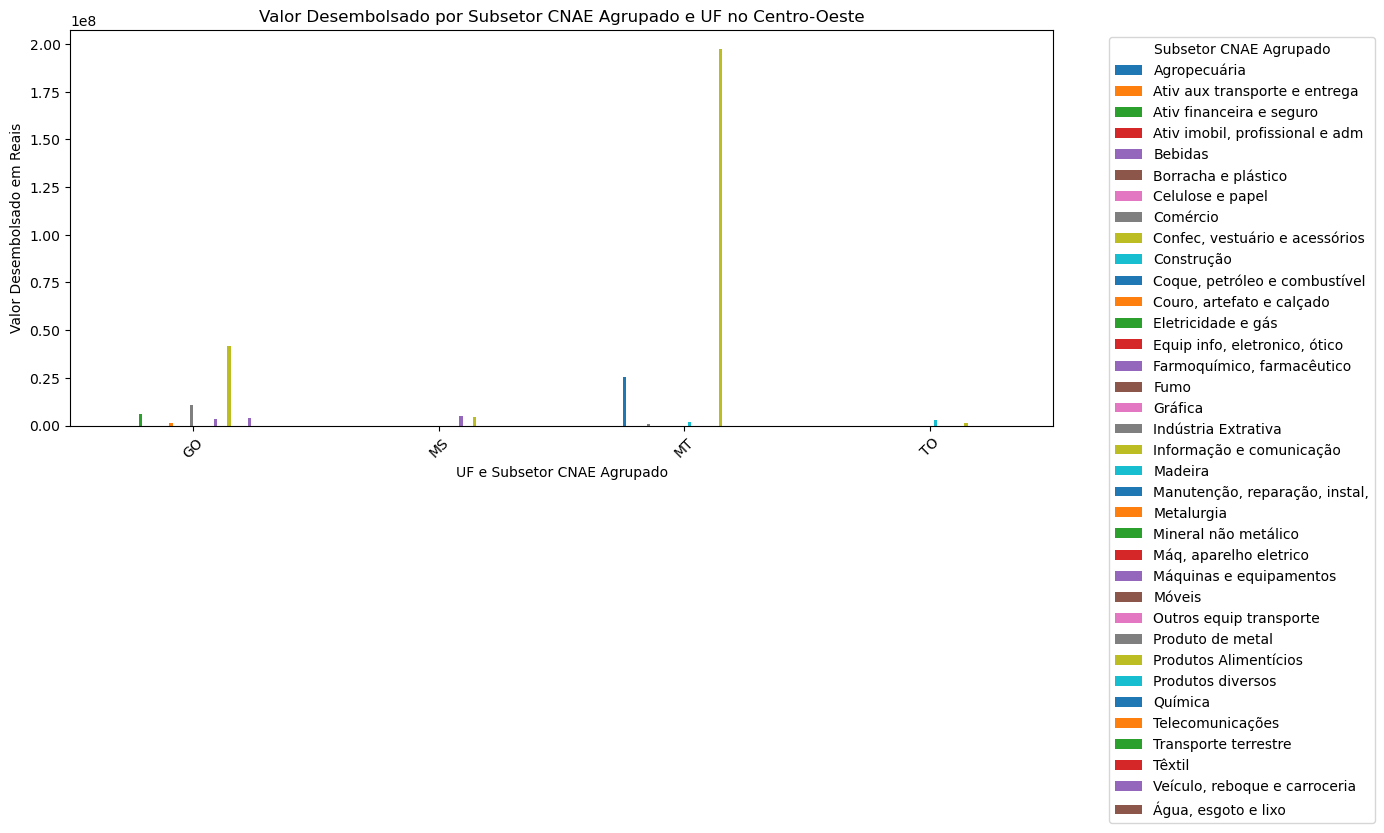

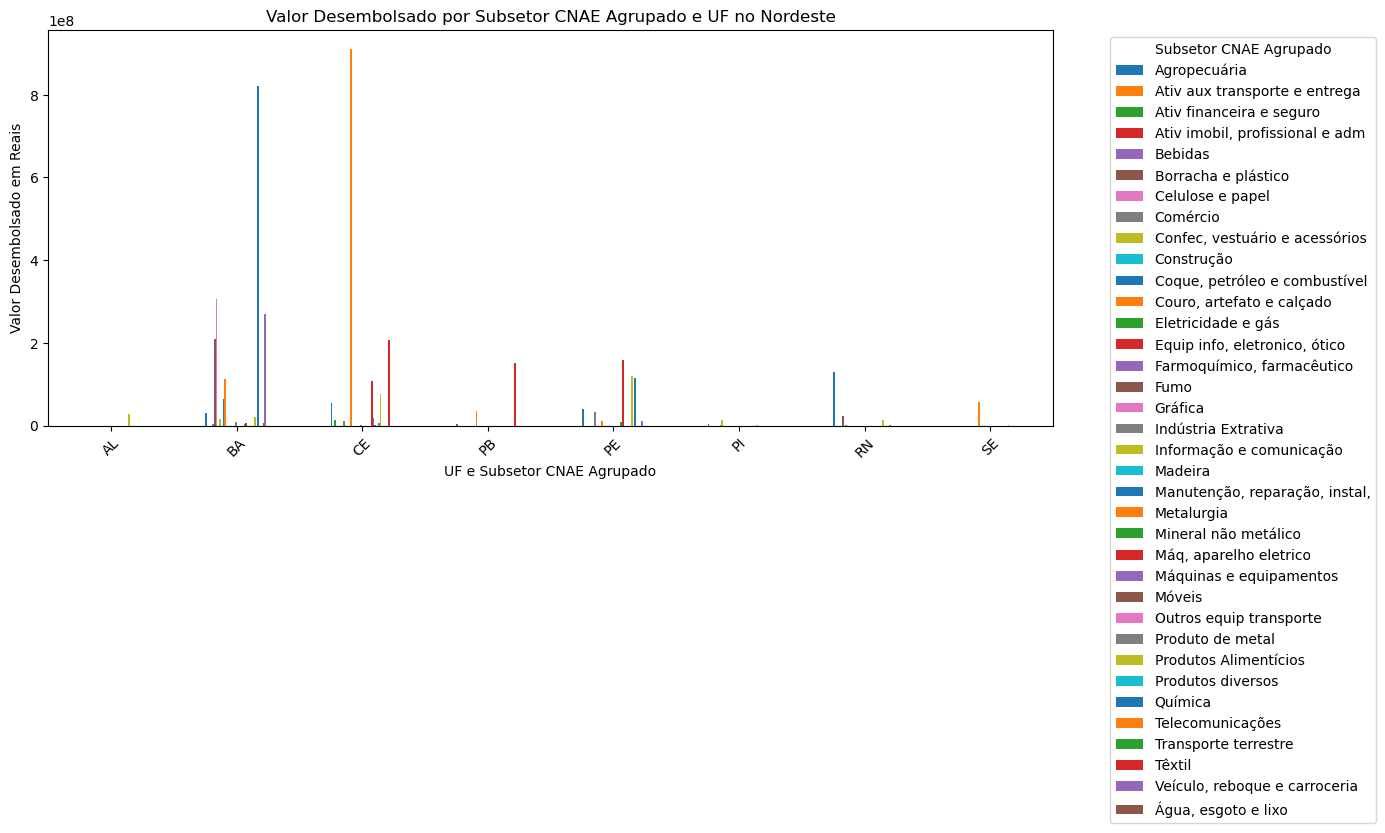

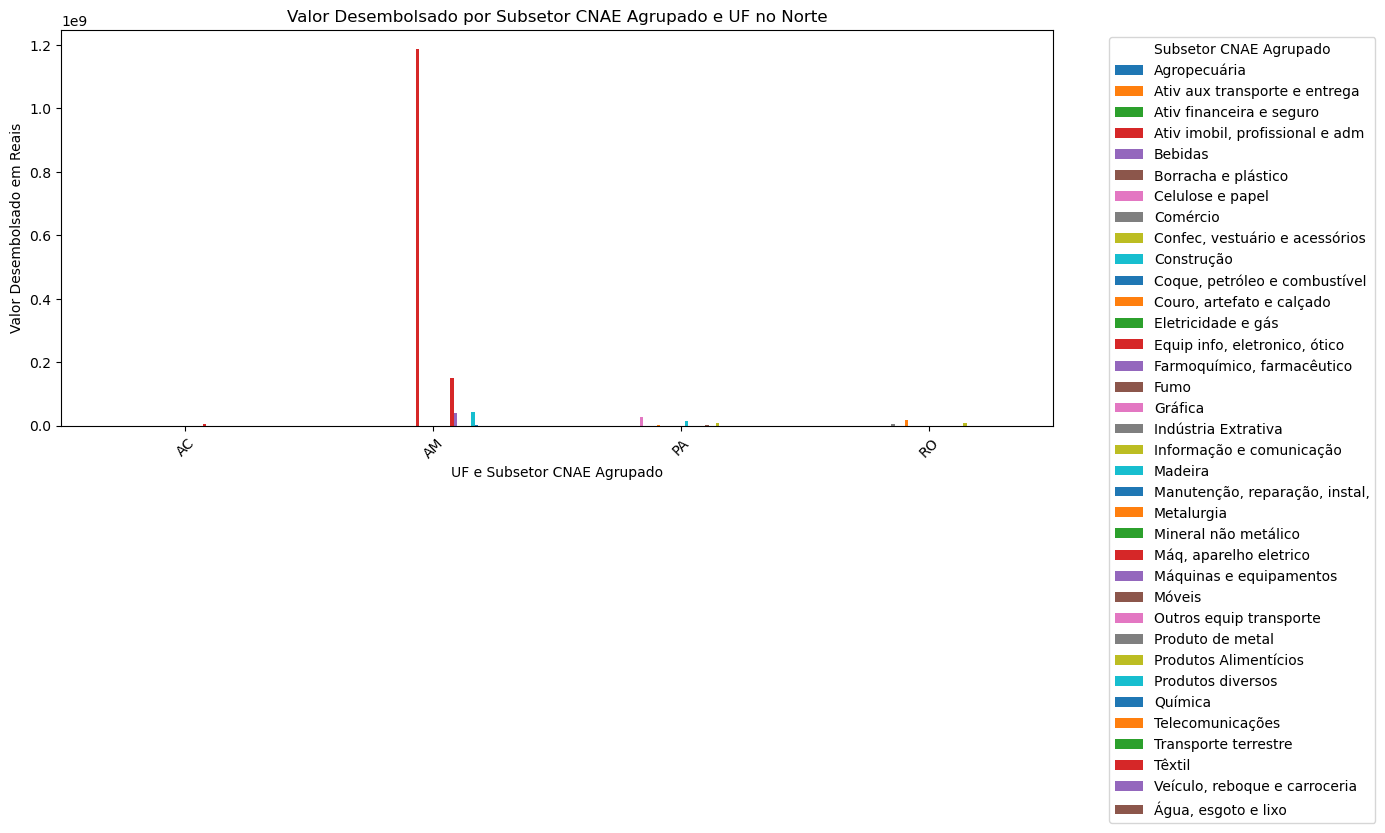

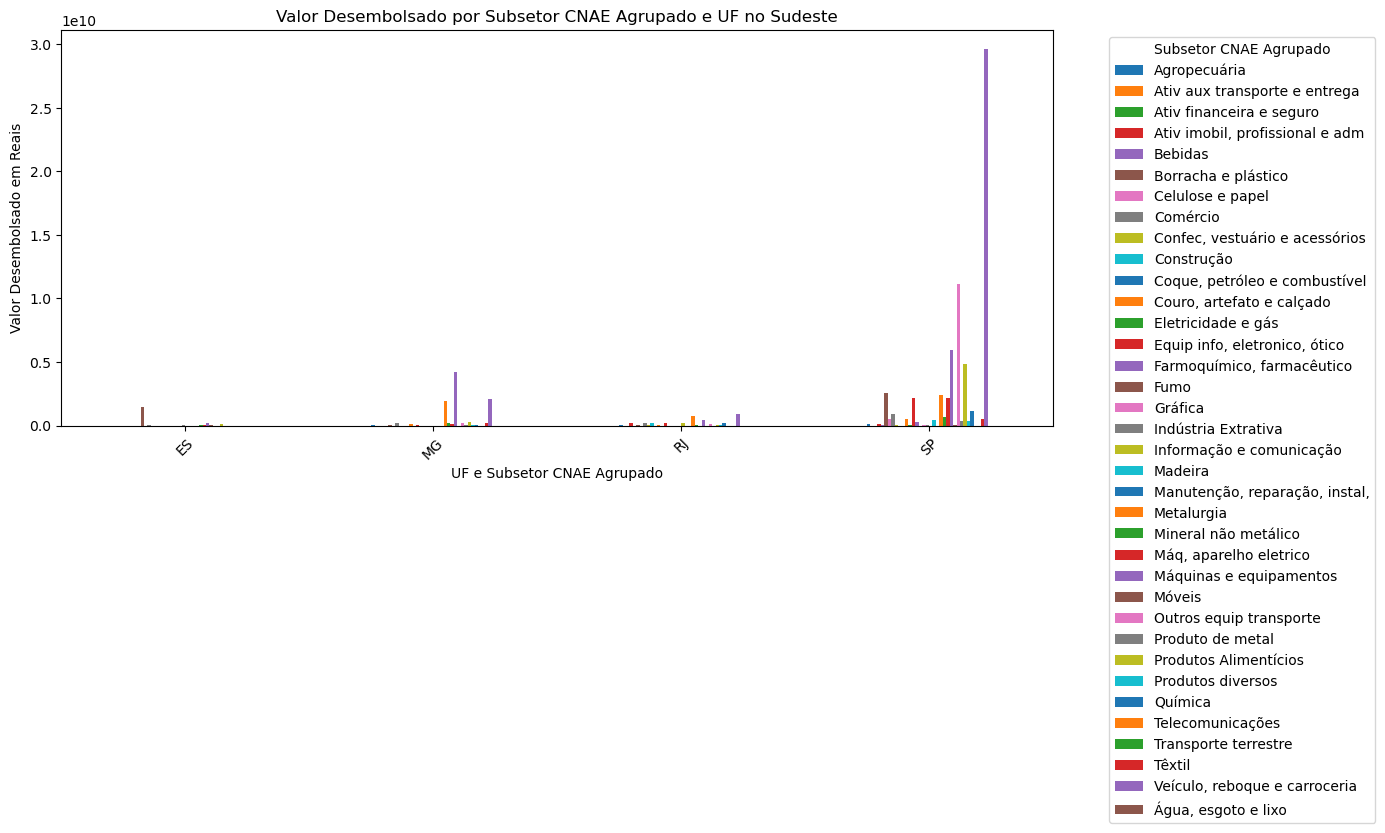

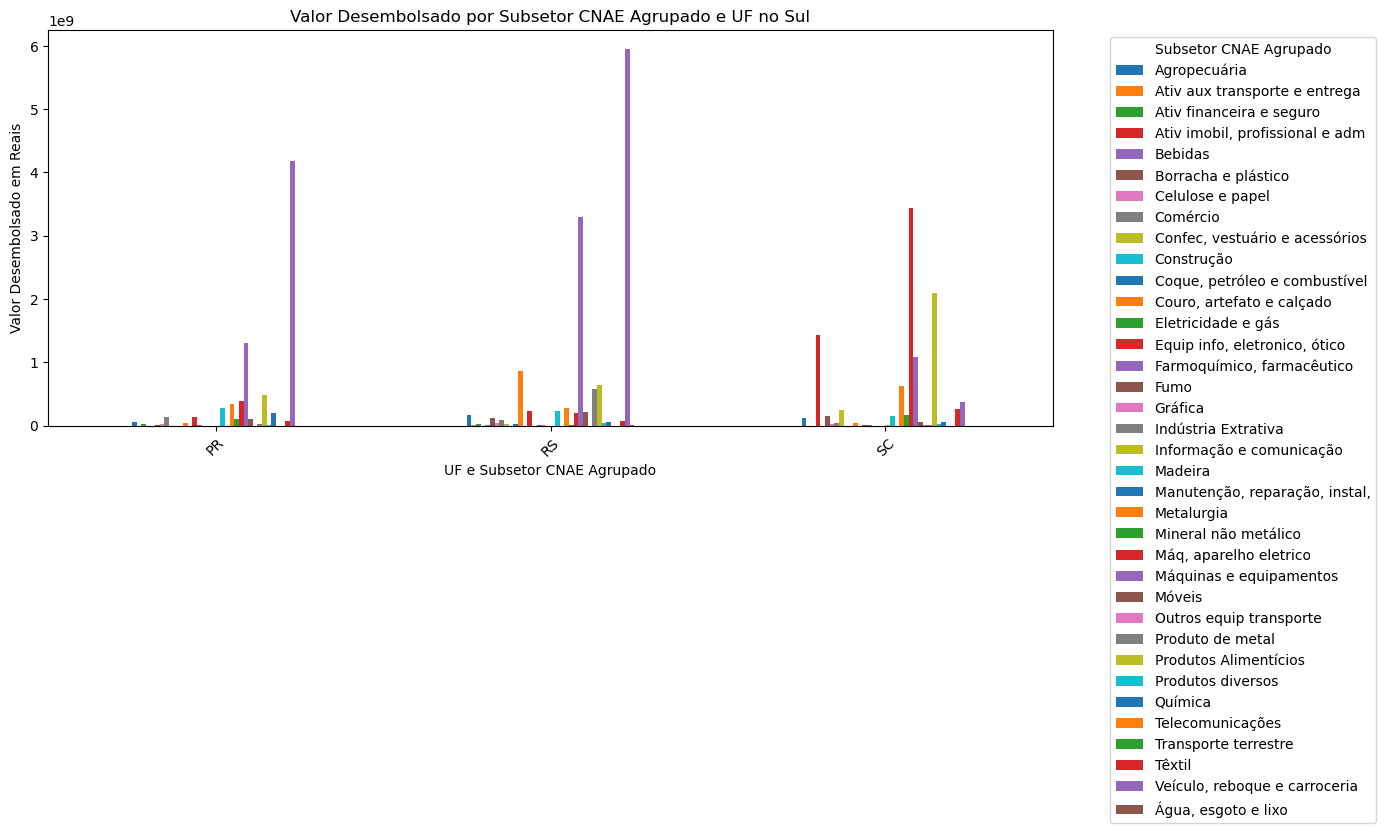

In [14]:
for Região in pivot_table.index.get_level_values(0).unique():
    Regiãoal_data = pivot_table.xs(Região, level='Região')
    Regiãoal_data.plot(kind='bar', figsize=(14, 7))
    plt.title(f'Valor Desembolsado por Subsetor CNAE Agrupado e UF no {Região}')
    plt.ylabel('Valor Desembolsado em Reais')
    plt.xlabel('UF e Subsetor CNAE Agrupado')
    plt.xticks(rotation=45)
    plt.legend(title='Subsetor CNAE Agrupado', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


## Distribuição categórica

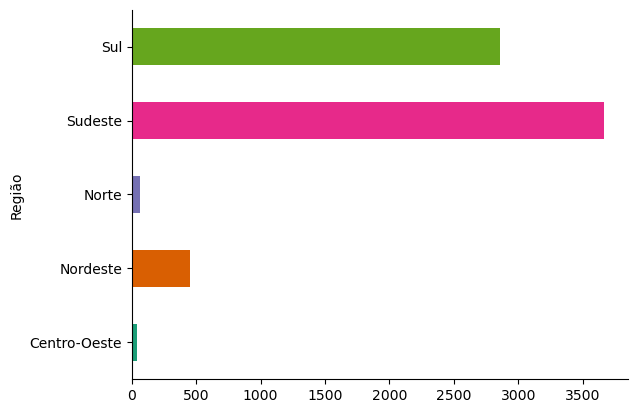

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Região').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

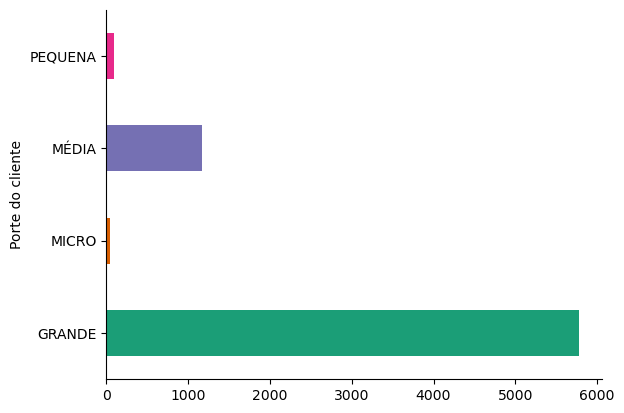

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Porte do cliente').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

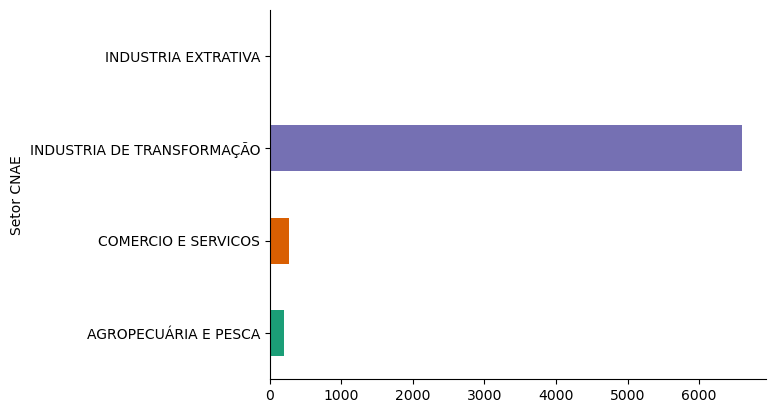

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Setor CNAE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Análise Temporal

In [18]:
df['Ano da Operação'] = pd.to_datetime(df['Ano da Operação'], format='%Y')

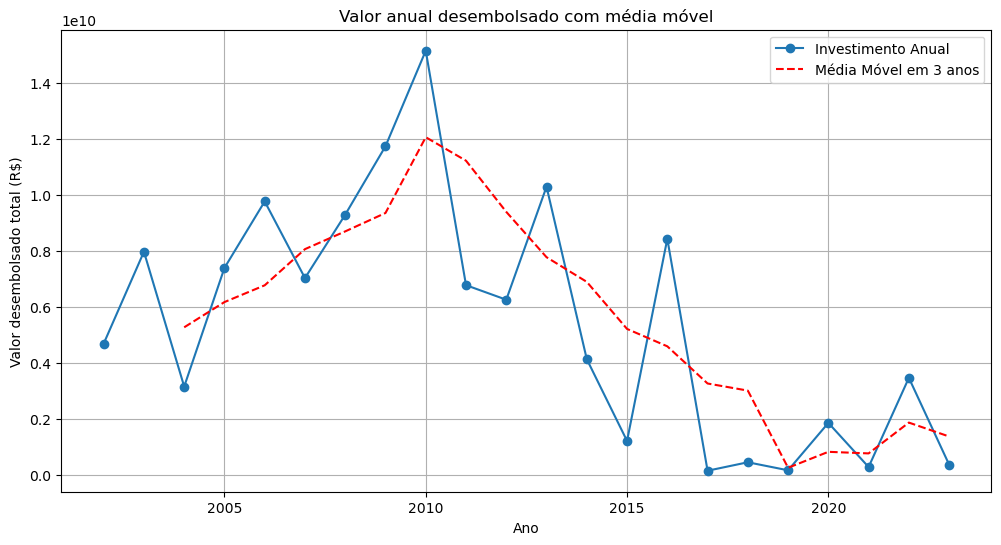

In [19]:
yearly_data = df.groupby(df['Ano da Operação'].dt.year)['Valor da Operação em R$'].sum()
moving_average = yearly_data.rolling(window=3).mean()  

plt.figure(figsize=(12, 6))
plt.plot(yearly_data, marker='o', label='Investimento Anual')
plt.plot(moving_average, color='red', linestyle='--', label='Média Móvel em 3 anos')
plt.title('Valor anual desembolsado com média móvel')
plt.xlabel('Ano')
plt.ylabel('Valor desembolsado total (R$)')
plt.legend()
plt.grid(True)
plt.show()


## Por setor

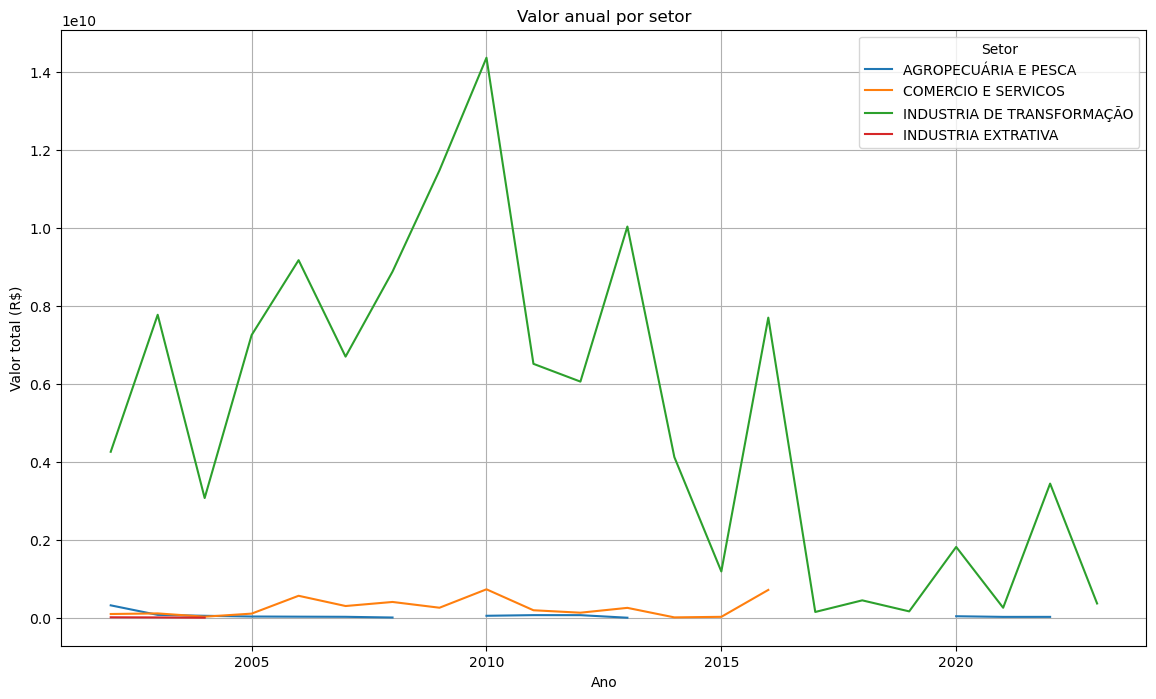

In [20]:
df['Year'] = pd.to_datetime(df['Ano da Operação'], format='%Y')

df['Valor da Operação em R$'] = df['Valor da Operação em R$'].astype(float)
sector_yearly_data = df.groupby([df['Year'].dt.year, 'Setor CNAE'])['Valor da Operação em R$'].sum().unstack()

plt.figure(figsize=(14, 8))
for column in sector_yearly_data.columns:
    plt.plot(sector_yearly_data.index, sector_yearly_data[column], marker='', linestyle='-', label=column)
plt.title('Valor anual por setor')
plt.xlabel('Ano')
plt.ylabel('Valor total (R$)')
plt.legend(title='Setor', loc='upper right')
plt.grid(True)
plt.show()


In [21]:
# plt.figure(figsize=(14, 10))  # Adjust the size as needed

# # We use np.random.rand to add some random noise to the y-values for better visualization (jitter)
# for (uf, group) in df.groupby('Região'):
#     plt.scatter(group['Setor CNAE'], group['Valor Desembolsado em Reais'] + np.random.rand(len(group)) * 50000, label=uf, alpha=0.6)

# # Adding titles and labels
# plt.title('Valor Desembolsado em Reais by Setor CNAE and UF')
# plt.xlabel('Setor CNAE')
# plt.ylabel('Valor Desembolsado em Reais')

# # Rotating x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Adding legend outside the plot
# plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show plot
# plt.tight_layout()
# plt.show()

## Codificando colunas categóricas para análise de regressão

In [22]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# categorical_vars = ['Cliente', 'UF', 'Ano da Operação', 'Setor CNAE', 'Subsetor CNAE Agrupado', 'Porte do cliente', 'Natureza', 'Instituição Financeira Credenciada', 'Região']
# for col in categorical_vars:
#     df[col] = label_encoder.fit_transform(df[col])

In [23]:
pr

NameError: name 'pr' is not defined

In [24]:
X = df.drop(columns = ['Cliente', 'Ano da Operação', 'Valor Desembolsado em Reais','Valor da Operação em R$', 'Year'], axis=1)

In [25]:
df = df.drop(columns = ['Valor da Operação em R$', 'Year'], axis = 1)

In [26]:
df_dummy = df.drop(columns=['Valor Desembolsado em Reais', 'Subsetor CNAE Agrupado', 'Ano da Operação', 'Instituição Financeira Credenciada', 'Região'])
df_dummy = pd.get_dummies(df_dummy, drop_first=True)

In [27]:
df_dummy

,Cliente_A FERREIRA INDUSTRIA COMERCIO E EXPORTACAO LTDA,Cliente_A GRINGS S/A,"Cliente_A,M,C, TEXTIL LTDA,","Cliente_A,W, FABER CASTELL S,A,","Cliente_AAM DO BRASIL LTDA,",Cliente_AAT INTERNATIONAL LTDA,Cliente_ABC-INDUSTRIA E COMERCIO S/A-ABC-INCO,Cliente_ACE SCHMERSAL ELETROELETRONICA INDUSTRIAL LTDA,"Cliente_ACECO TI LTDA,","Cliente_ACOS VILLARES S/A,",...,UF_SC,UF_SE,UF_SP,UF_TO,Setor CNAE_COMERCIO E SERVICOS,Setor CNAE_INDUSTRIA DE TRANSFORMAÇÃO,Setor CNAE_INDUSTRIA EXTRATIVA,Porte do cliente_MICRO,Porte do cliente_MÉDIA,Porte do cliente_PEQUENA
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7081,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
7082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7083,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7084,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Regressão univariada

In [28]:
# import statsmodels.api as sm

# dependent_var = df['Valor Desembolsado em Reais']

# for column in df.columns:
#     if column != 'Valor Desembolsado em Reais':  
 
#         independent_var = sm.add_constant(df[column]) 


#         model = sm.OLS(dependent_var, independent_var)
        
#         results = model.fit()
        
#         print(f"Resultados para {column}:")
#         print(results.summary())

        
#         plt.figure(figsize=(10, 6)) 
#         sns.scatterplot(x=df[column], y=dependent_var, color='blue', alpha=0.6)  
#         sns.regplot(x=df[column], y=dependent_var, scatter=False, color='red')  
#         plt.title(f'Análise de Regressão: {column} vs. Valor Desembolsado em Reais')
#         plt.xlabel(column)
#         plt.ylabel('Valor Desembolsado em Reais')
#         plt.show()

#         print("\n\n")

## Regressão multivariada

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo a variável dependente
dependent_var = df['Valor Desembolsado em Reais']

# Selecionando todas as outras colunas como variáveis independentes
# independent_vars = df.drop(columns=['Valor Desembolsado em Reais', 'Subsetor CNAE Agrupado', 'Ano da Operação', 'Instituição Financeira Credenciada', 'Região'])
independent_vars = df_dummy
# independent_vars = pd.get_dummies(independent_vars, drop_first=True)
independent_vars.describe()

,Cliente_A FERREIRA INDUSTRIA COMERCIO E EXPORTACAO LTDA,Cliente_A GRINGS S/A,"Cliente_A,M,C, TEXTIL LTDA,","Cliente_A,W, FABER CASTELL S,A,","Cliente_AAM DO BRASIL LTDA,",Cliente_AAT INTERNATIONAL LTDA,Cliente_ABC-INDUSTRIA E COMERCIO S/A-ABC-INCO,Cliente_ACE SCHMERSAL ELETROELETRONICA INDUSTRIAL LTDA,"Cliente_ACECO TI LTDA,","Cliente_ACOS VILLARES S/A,",...,UF_SC,UF_SE,UF_SP,UF_TO,Setor CNAE_COMERCIO E SERVICOS,Setor CNAE_INDUSTRIA DE TRANSFORMAÇÃO,Setor CNAE_INDUSTRIA EXTRATIVA,Porte do cliente_MICRO,Porte do cliente_MÉDIA,Porte do cliente_PEQUENA
count,7080,7080,7080,7080,7080,7080,7080,7080,7080,7080,...,7080,7080,7080,7080,7080,7080,7080,7080,7080,7080
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
freq,7078,7075,7076,7057,7074,7078,7078,7077,7079,7069,...,6180,7076,4089,7077,6806,6602,7068,7032,5915,6987


In [31]:
# Adicionando uma constante ao modelo
independent_vars = sm.add_constant(independent_vars)

In [32]:
# Criando o modelo de regressão OLS
model = sm.OLS(dependent_var, df_dummy)

# Ajustando o modelo
results = model.fit()

# Exibindo o resumo dos resultados
print(results.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Valor Desembolsado em Reais   R-squared (uncentered):                   0.551
Model:                                     OLS   Adj. R-squared (uncentered):              0.442
Method:                          Least Squares   F-statistic:                              5.077
Date:                         Mon, 27 May 2024   Prob (F-statistic):                        0.00
Time:                                 12:12:15   Log-Likelihood:                     -1.3237e+05
No. Observations:                         7080   AIC:                                  2.675e+05
Df Residuals:                             5704   BIC:                                  2.769e+05
Df Model:                                 1376                                                  
Covariance Type:                     nonrobust                                                  
                              

## Regressão Logarítmica unviariada

In [33]:
# dependent_var_transformed = np.log(df['Valor Desembolsado em Reais'] + 1)

# for column in df.columns:
#     if column != 'Valor Desembolsado em Reais':
#         independent_var = sm.add_constant(df[column])

#         model = sm.OLS(dependent_var_transformed, independent_var)
        
#         results = model.fit()
        
#         print(f"Transformação logarítmica da variável dependente e variável independente {column}:")
#         print(results.summary())

#         plt.figure(figsize=(10, 6))
#         sns.scatterplot(x=df[column], y=dependent_var_transformed, color='blue', alpha=0.6)
#         sns.regplot(x=df[column], y=dependent_var_transformed, scatter=False, color='red')
#         plt.title(f'Análise da Regressão: {column} vs. log(Valor Desembolsado em Reais)')
#         plt.xlabel(column)
#         plt.ylabel('log(Valor Desembolsado em Reais)')
#         plt.show()

#         print("\n\n")

## Logarítmica multivariada

In [34]:
# Transformando a variável dependente em logaritmo
dependent_var_log = np.log(df['Valor Desembolsado em Reais'] + 1)  # +1 para evitar log de zero

# Selecionando as variáveis independentes
independent_vars = df.drop(columns=['Valor Desembolsado em Reais', 'Subsetor CNAE Agrupado', 'Ano da Operação', 'Instituição Financeira Credenciada','Região'])

# Adicionando uma constante ao modelo
independent_vars = sm.add_constant(independent_vars)

# Criando o modelo de regressão OLS com a variável dependente transformada
model_log = sm.OLS(dependent_var_log, independent_vars)

# Ajustando o modelo
results_log = model_log.fit()

# Exibindo o resumo dos resultados
print(results_log.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Interpretação: A interpretação dos coeficientes em uma regressão logarítmica muda. Um coeficiente agora representa a mudança percentual na variável dependente esperada para uma mudança de uma unidade na variável independente, mantendo as outras constantes.